In [4]:
!pip3 install pandas


'pip3' is not recognized as an internal or external command,
operable program or batch file.


In [40]:
import pandas as pd
country_drug = pd.read_csv("drug_country_1.csv")
country_disease = pd.read_csv("disease_country.csv")
country_disease.head()




html_string = '''
<html>
  <head><title>HTML Pandas Dataframe with CSS</title></head>
  <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous">
<script src="https://code.jquery.com/jquery-3.3.1.slim.min.js" integrity="sha384-q8i/X+965DzO0rT7abK41JStQIAqVgRVzpbzo5smXKp4YfRvH+8abtTE1Pi6jizo" crossorigin="anonymous"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.7/umd/popper.min.js" integrity="sha384-UO2eT0CpHqdSJQ6hJty5KVphtPhzWj9WO1clHTMGa3JDZwrnQq4sF86dIHNDz0W1" crossorigin="anonymous"></script>
<script src="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/js/bootstrap.min.js" integrity="sha384-JjSmVgyd0p3pXB1rRibZUAYoIIy6OrQ6VrjIEaFf/nJGzIxFDsf4x0xIM+B07jRM" crossorigin="anonymous"></script>
  <body>
    {table}
  </body>
</html>.
'''

# OUTPUT AN HTML FILE
with open('country_disease.html', 'w') as f:
    f.write(html_string.format(table=country_disease.to_html(classes='table table-striped')))


In [39]:
country_drug.head()
  
html_string = '''
<html>
  <head><title>HTML Pandas Dataframe with CSS</title></head>
  <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous">
<script src="https://code.jquery.com/jquery-3.3.1.slim.min.js" integrity="sha384-q8i/X+965DzO0rT7abK41JStQIAqVgRVzpbzo5smXKp4YfRvH+8abtTE1Pi6jizo" crossorigin="anonymous"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.7/umd/popper.min.js" integrity="sha384-UO2eT0CpHqdSJQ6hJty5KVphtPhzWj9WO1clHTMGa3JDZwrnQq4sF86dIHNDz0W1" crossorigin="anonymous"></script>
<script src="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/js/bootstrap.min.js" integrity="sha384-JjSmVgyd0p3pXB1rRibZUAYoIIy6OrQ6VrjIEaFf/nJGzIxFDsf4x0xIM+B07jRM" crossorigin="anonymous"></script>
  <body>
    {table}
  </body>
</html>.
'''

# OUTPUT AN HTML FILE
with open('country_disease.html', 'w') as f:
    f.write(html_string.format(table=country_drug.to_html(classes='table table-striped')))

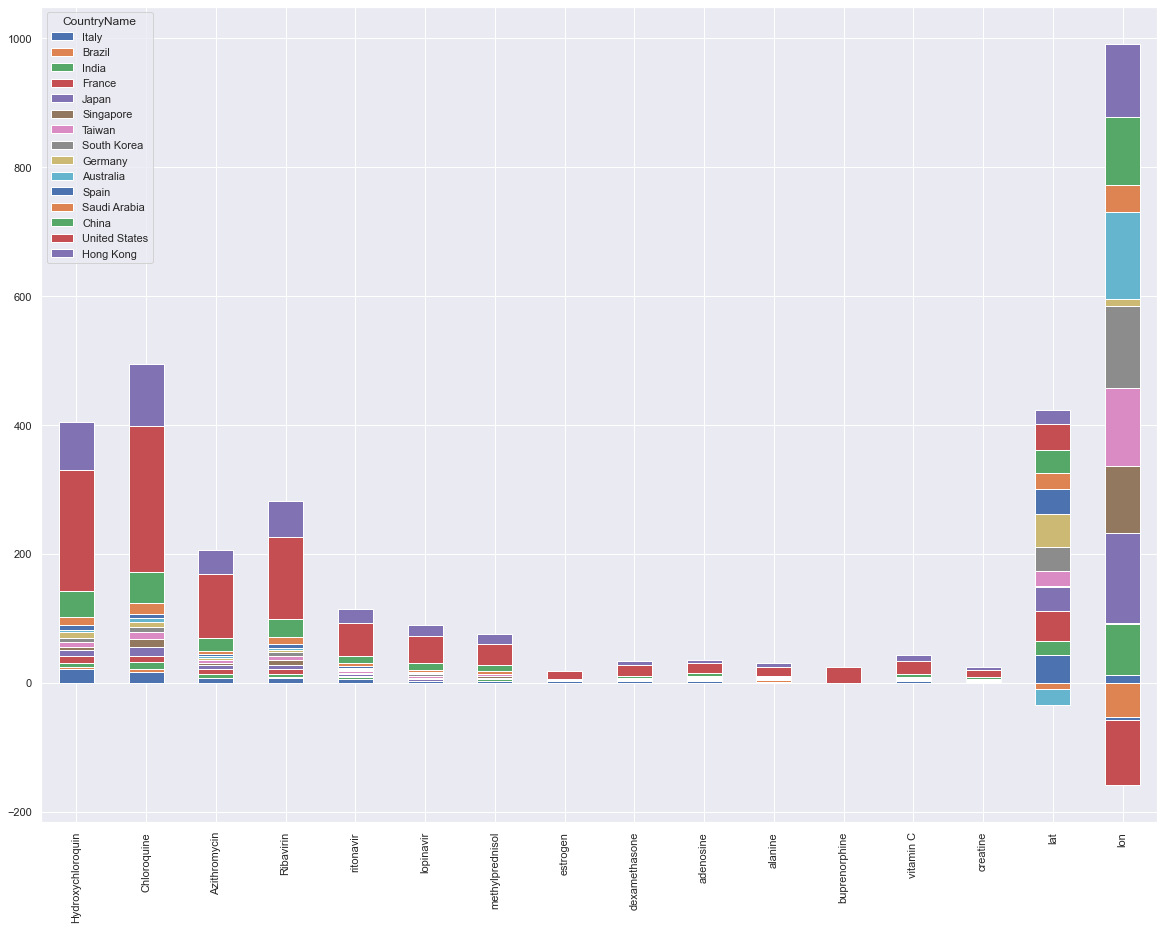

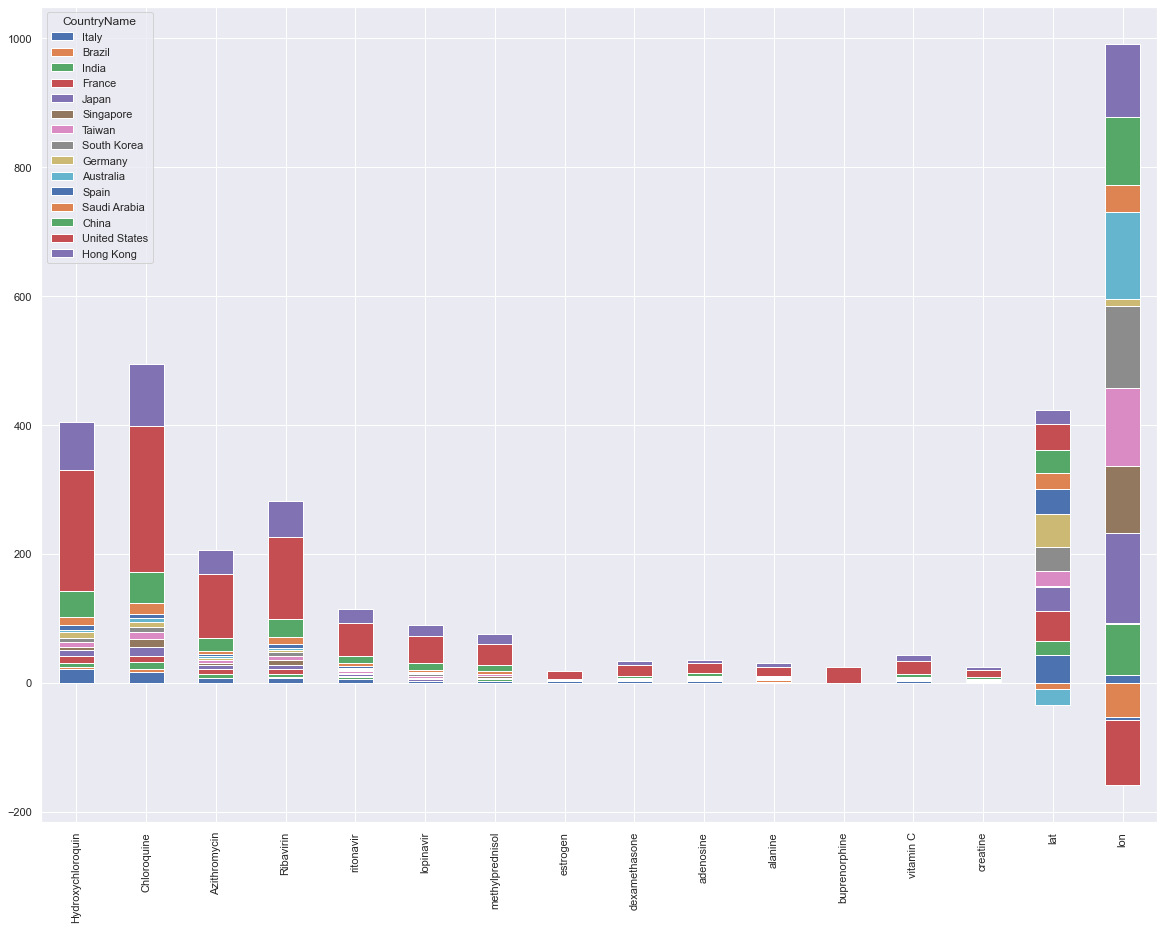

In [33]:
import seaborn as sns
sns.set()
country_drug.set_index('CountryName').T.plot(kind='bar', figsize=(20,15), stacked=True)
fig1=country_drug.set_index('CountryName').T
fig1.plot(kind='bar',  figsize=(20,15), stacked=True).get_figure().savefig('country_drug.png')

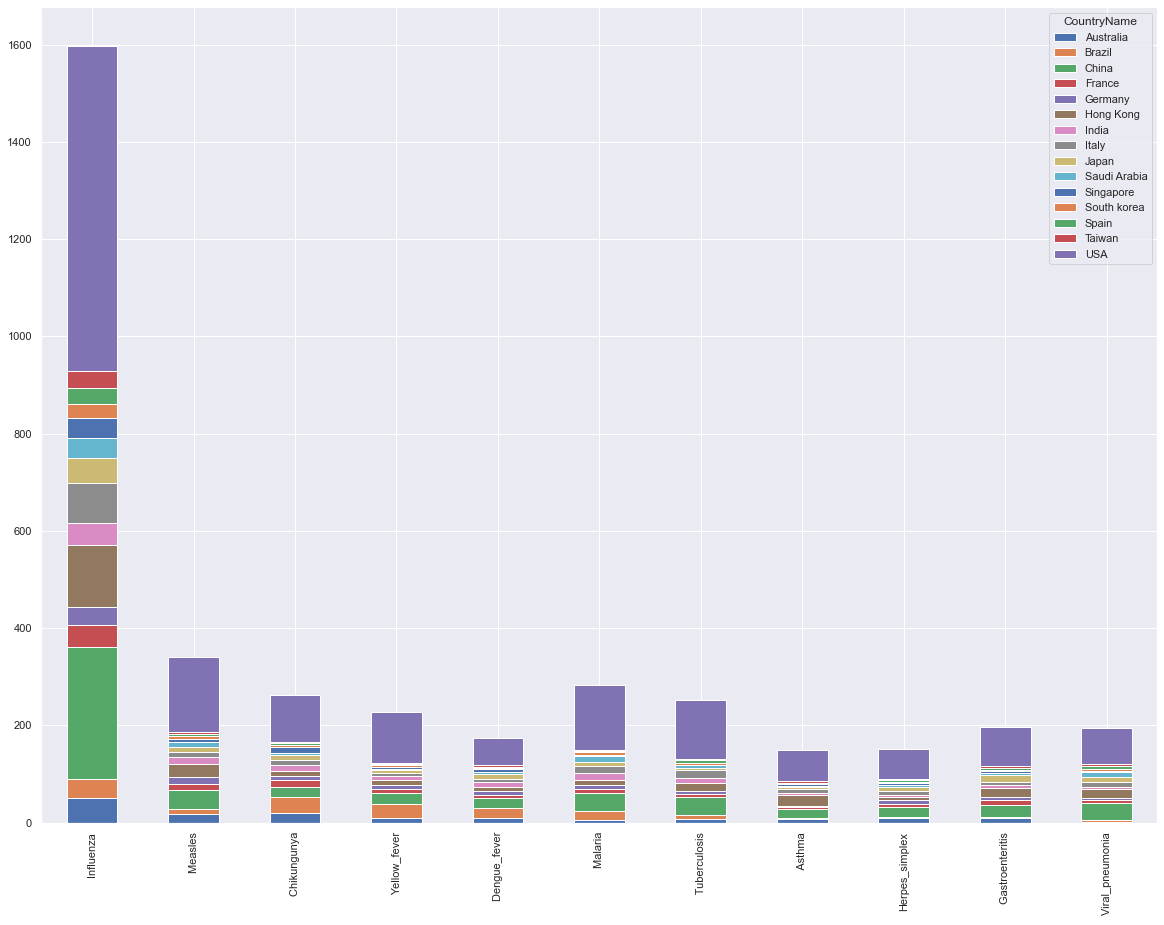

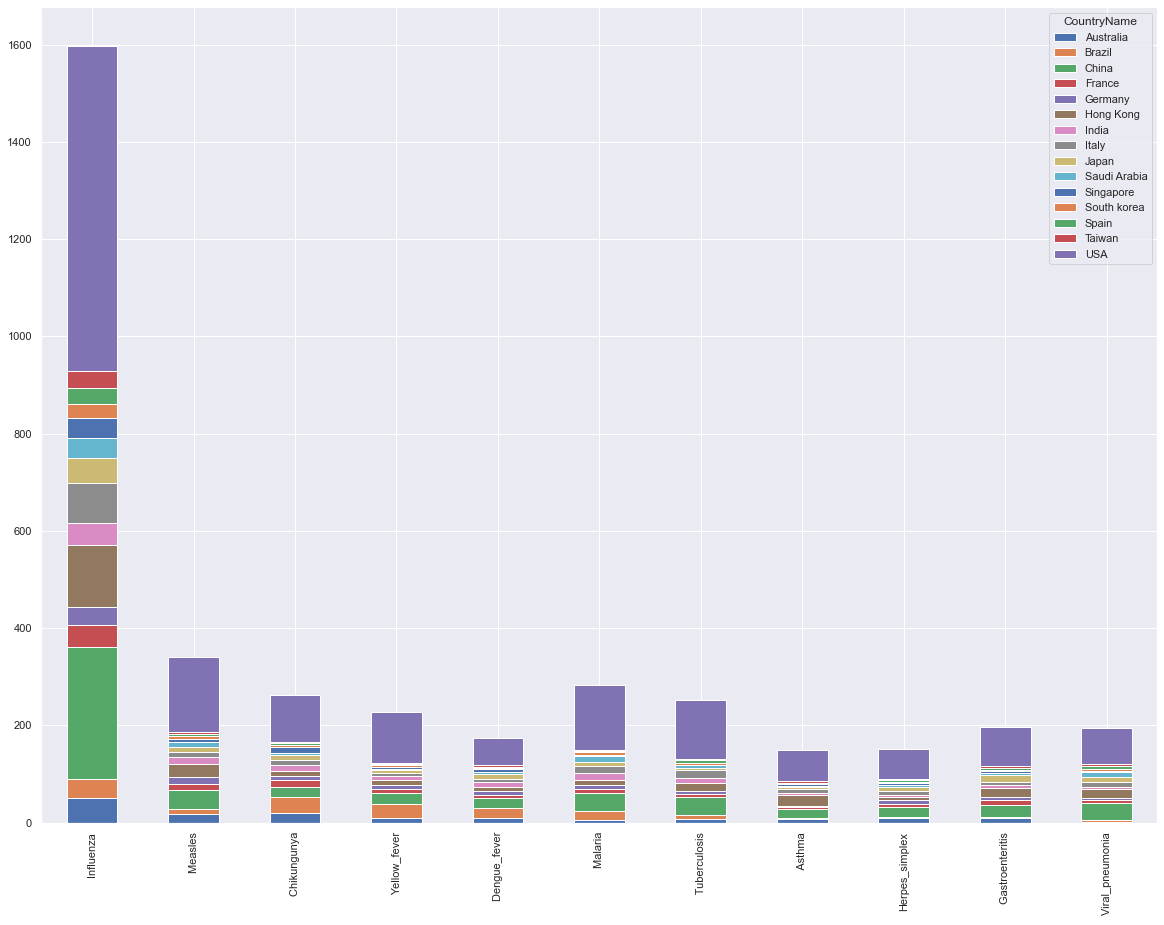

In [32]:
country_disease.set_index('CountryName').T.plot(kind='bar',  figsize=(20,15), stacked=True)
fig=country_disease.set_index('CountryName').T
fig.plot(kind='bar',  figsize=(20,15), stacked=True).get_figure().savefig('country_disease.png')


### Plotting on the world map

In [11]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import geocoder

In [12]:
#!pip install opencage

from opencage.geocoder import OpenCageGeocode

### Need to get personal api key from https://opencagedata.com
key = "b4857565fb3740e5b5cabe83e10e6bbb"  ### put your api key here
# get api key from:  https://opencagedata.com

geocoder = OpenCageGeocode(key)

In [13]:
list_lat = []   # create empty lists

list_long = []


	
for index, row in country_drug.iterrows(): # iterate over rows in dataframe

    City = row['CountryName']
    query = str(City)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long)

	
# create new columns from lists    

country_drug['lat'] = list_lat   

country_drug['lon'] = list_long

In [20]:
#!pip install folium
# Create a world map to show distributions of drugs reported in papers 
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker 
for i in range(len(country_drug)):
        lat = country_drug.iloc[i]['lat']
        long = country_drug.iloc[i]['lon']
        radius=5
        popup_text = """Country : {}<br>
                    Drugs: {}<br>"""
        popup_text = popup_text.format(country_drug.iloc[i]['CountryName'],
                                   country_drug.iloc[i]['Chloroquine'],
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
        

#show the map
world_map
world_map.save('worldmap.html')

### Mapping countries reportin the use of drugs 

In [17]:
map1= folium.Map(location=[10,20], zoom_start=2, tiles='http://tile.stamen.com/toner-lite/{z}/{x}/{y}.png',attr="Dr.Katharina Glass")

In [18]:
#Put locations to the list:

locations = country_drug[['lat', 'lon']]

locationlist = locations.values.tolist()

#Then, plot the cities:

for i in range(0, len(locationlist)):

  folium.Marker(locationlist[i],

                  popup=country_drug['CountryName'][i],

                 icon=folium.Icon(color='darkblue',icon= 'default',prefix='fa')

             ).add_to(map1)



In [19]:
map1.save('map1.html')
